In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
df_datasets = pd.read_csv('datasets.csv', delimiter=';', quotechar='"')
df_datasets.head()

,Dataset,Number of citations (Google Scholar since 2020),Number of usage (Papers with code since 2020),Music/Speech/Sounds,Link,Paper Link,Model in Paper (Paper Link if Link Model Paper == null),Score or best score in Paper,Metrics in Paper,Year,...,Size (Hours),Contents based on,Source,Language,Number of Benchmarks (Audio Classification or Recognition Papers with Code different models),Best Scoure,Best Model related to scoure,Metrics related to scoure,Link Model Paper,Comment
0,AudioSet,"5580,00","581,00",Sounds,https://research.google.com/audioset/,https://ieeexplore.ieee.org/document/7952261,CNN,"31,400",mAP (mean Average Precision),2017,...,58000,short video clips,Youtube,English,"53,00","55,80",OmniVec2,mAP (mean Average Precision),https://paperswithcode.com/paper/omnivec2-a-no...,NaN
1,AudioCaps,"761,00","218,00",Sounds,https://audiocaps.github.io/,https://aclanthology.org/N19-1011/,VGGish-LSTM,"19,3;50,9",METEOR;CIDEr,2019,...,"108,60",audio clips,AudioSet subset,English,NaN,NaN,NaN,NaN,NaN,NaN
2,AVSpeech,"730,00","36,00",Speech,https://looking-to-listen.github.io/,https://arxiv.org/abs/1804.03619,NaN,NaN,NaN,2018,...,4700,short video clips,Youtube; TED Talks,English,NaN,NaN,NaN,NaN,NaN,NaN
3,UrbanSound8K,"1330,00","99,00",Sounds,https://urbansounddataset.weebly.com/urbansoun...,https://www.justinsalamon.com/uploads/4/3/9/4/...,SVM,"70,000",Accuracy,2014,...,27607,audio clips,Freesound.org,NaN,"4,00","98,05",FACE,Accuracy,https://arxiv.org/pdf/2303.03666v1,NaN
4,ESC-50,"1820,00","298,00",Sounds,https://github.com/karolpiczak/ESC-50,https://dl.acm.org/doi/10.1145/2733373.2806390,NaN,NaN,NaN,2015,...,28157,audio clips,Freesound.org,NaN,"50,00","99,10",OmniVec2,Accuracy,https://paperswithcode.com/paper/omnivec2-a-no...,NaN


In [13]:
print("Basic Info:\n")
print(df_datasets.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Dataset                                                                                       50 non-null     object
 1   Number of citations (Google Scholar since 2020)                                               48 non-null     object
 2   Number of usage (Papers with code since 2020)                                                 50 non-null     object
 3   Music/Speech/Sounds                                                                           50 non-null     object
 4   Link                                                                                          50 non-null     object
 5   Paper Link               

In [14]:
numeric_columns = ['Number of citations (Google Scholar since 2020)', 'Number of usage (Papers with code since 2020)', 
                   'Score or best score in Paper', 'Size (Hours)', 
                   'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)',
                   'Best Scoure']

df_datasets[numeric_columns] = df_datasets[numeric_columns].replace({',':'.'}, regex=True)
df_datasets[numeric_columns] = df_datasets[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [15]:
# top 5 most cited datasets
most_cited = df_datasets.nlargest(5, 'Number of citations (Google Scholar since 2020)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar since 2020)']])

# top 5 most used datasets
most_used = df_datasets.nlargest(5, 'Number of usage (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of usage (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)


Top 5 Most Cited Datasets:

               Dataset  Number of citations (Google Scholar since 2020)
15   TUT Sound Events                                           16800.0
29                MELD                                          11900.0
5          LibriSpeech                                           8850.0
13  Speech Commands V2                                           8260.0
46               Wham!                                           7660.0

Top 5 Most Used Datasets:

        Dataset  Number of usage (Papers with code since 2020)
5   LibriSpeech                                         1891.0
0      AudioSet                                          581.0
39      IEMOCAP                                          558.0
10     VoxCeleb                                          490.0
8   CommonVoice                                          363.0

Datasets by Category:

Music/Speech/Sounds
Sounds          23
Speech          19
Music            7
Music; Sound     1
Name: count, 

C:\Users\looki\AppData\Local\Temp\ipykernel_972\2917874451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


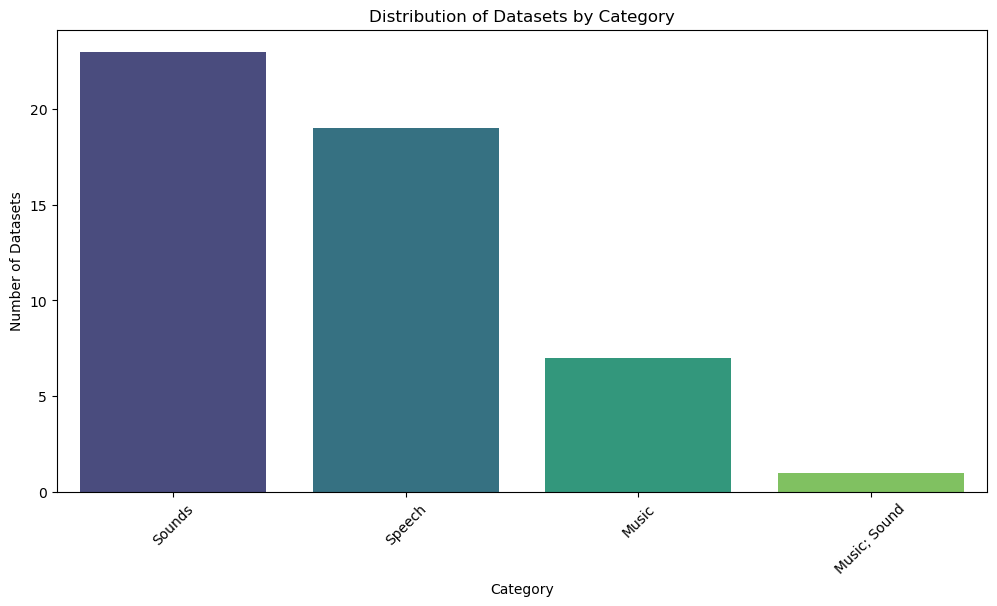

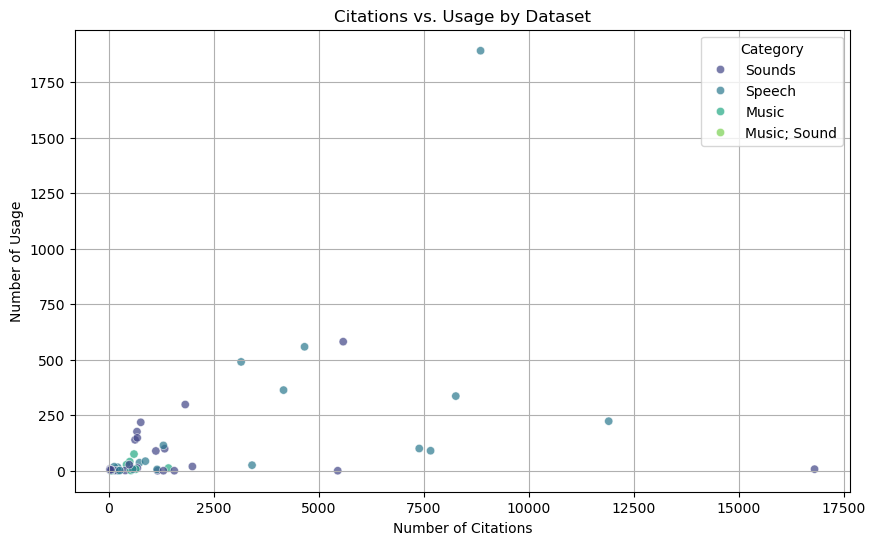

In [16]:
# visualizations
plt.figure(figsize=(12, 6))

# bar plot of dataset categories
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Datasets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Datasets')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper right')
plt.show()

# scatter plot of citations vs. usage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, 
                x='Number of citations (Google Scholar since 2020)', 
                y='Number of usage (Papers with code since 2020)', 
                hue='Music/Speech/Sounds', 
                palette='viridis', 
                alpha=0.7)
plt.title('Citations vs. Usage by Dataset')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Usage')
plt.legend(title='Category')
plt.grid(True)
plt.show()